#Linking with Google drive

In [7]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


#Importing required packages

In [10]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error, r2_score, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
import seaborn as sns
import seaborn as sns
import math

In [11]:
file_1 = '/gdrive/My Drive/Insurance risk and Analysis/policies_2017.csv'
df_2017 = pd.read_csv(file_1, parse_dates = True)
file_2 = '/gdrive/My Drive/Insurance risk and Analysis/potential_customers_2018.csv'
df_2018 = pd.read_csv(file_2, parse_dates = True)
df_2017.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,64080188,7/10/2017,M,2.0,1/4/1989,631.0,B,140.9,4,TRUCK,0.924,NaN,0,0.000000,716.53
1,18917133,7/31/2017,M,2.0,6/21/1985,531.0,C,136.5,3,HBACK,1.430,B,1,583.010876,716.53
2,82742606,2/1/2017,M,6.0,7/25/1942,838.0,D,88.8,3,SEDAN,1.100,D,1,159.375757,716.53
3,43601997,10/17/2017,M,5.0,6/8/1959,835.0,E,NaN,2,SEDAN,2.090,NaN,0,0.000000,716.53
4,58746861,4/13/2017,F,4.0,5/16/1967,748.0,C,123.0,3,HBACK,0.803,C,1,143.555642,716.53


#Checking accuracy of data imported

In [12]:
df_2018.head()

,quote_number,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value
0,29323463,F,4.0,4/14/1968,750.0,C,124.5,2,HBACK,1.100
1,16732441,M,2.0,10/4/1984,567.0,F,NaN,3,STNWG,2.079
2,68744228,M,4.0,11/30/1962,378.0,D,111.4,3,HDTOP,2.354
3,30875047,F,3.0,5/17/1973,807.0,E,NaN,4,UTE,1.969
4,37049210,M,6.0,10/2/1945,844.0,C,111.0,1,HBACK,1.969


#Tabular representation

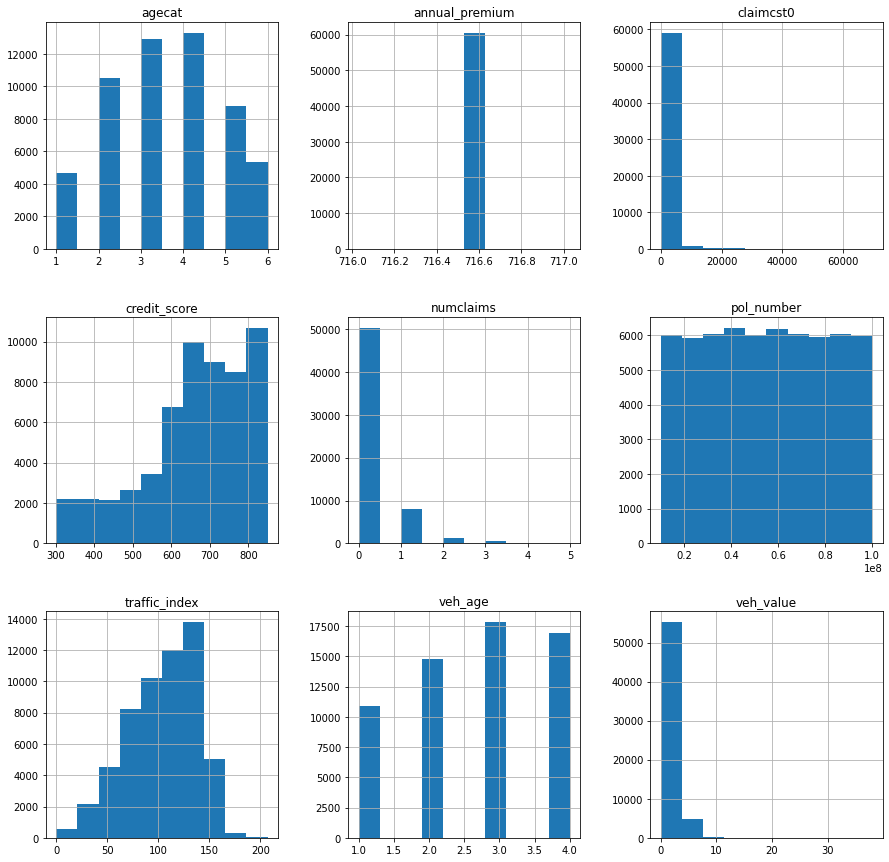

In [13]:
pd.DataFrame.hist(df_2017, figsize = [15,15]);

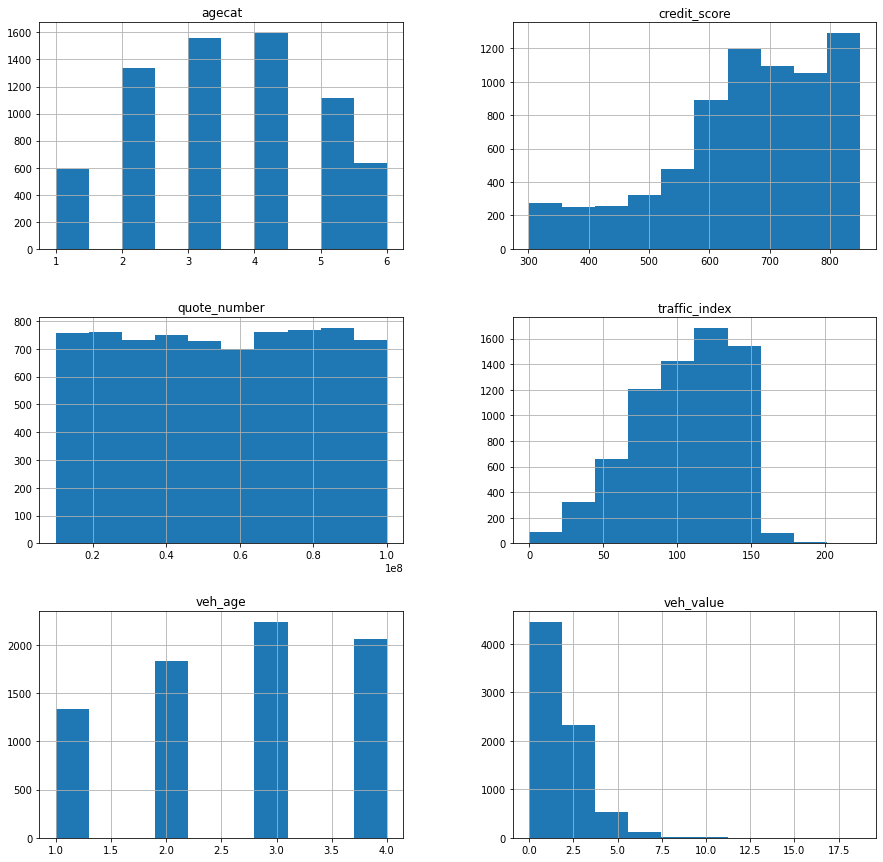

In [14]:
pd.DataFrame.hist(df_2018, figsize = [15,15]);

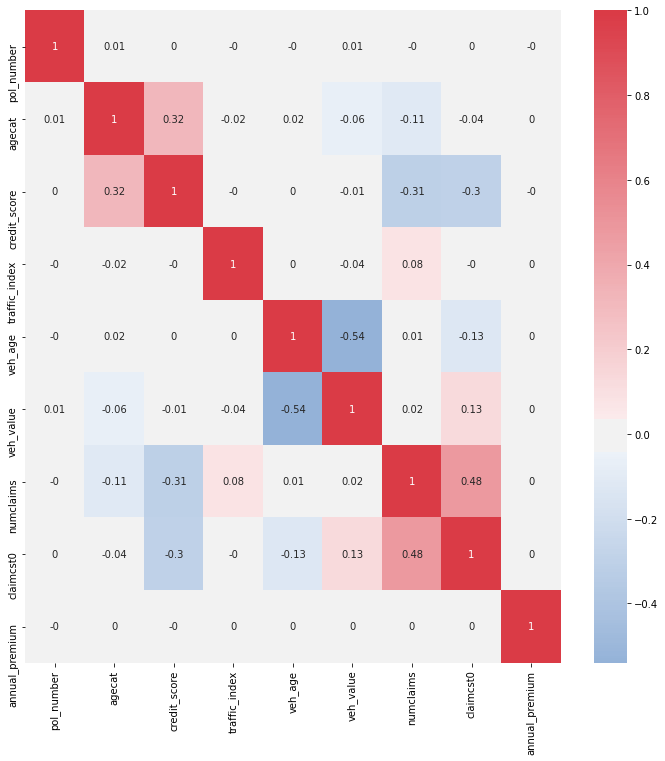

In [15]:
# Plotting Coorelation Matrix to see if there is any correlation
df_num = df_2017.select_dtypes(include = ['float64', 'int64'])  #To include data types int and float only, so only numbers
cor_matrix = df_num.corr().round(2)    #Round to digit 2, and create a correlation matrix
fig = plt.figure(figsize=(12,12));   
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

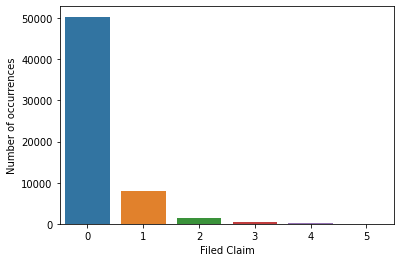

In [16]:
sns.countplot(df_2017.numclaims);
plt.xlabel('Filed Claim');
plt.ylabel('Number of occurrences');
plt.show()

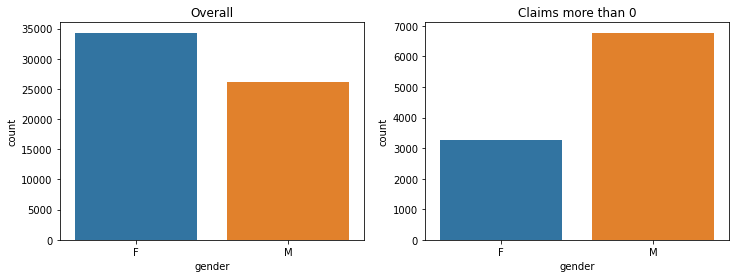

In [17]:
#Sort by sex
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,4)
g = sns.countplot(x='gender',data=df_2017.sort_values('gender'), ax=ax1)
title = g.set_title('Overall')
g = sns.countplot(x='gender',data=df_2017[df_2017['numclaims']>0].sort_values('gender'), ax=ax2)
title = g.set_title('Claims more than 0')

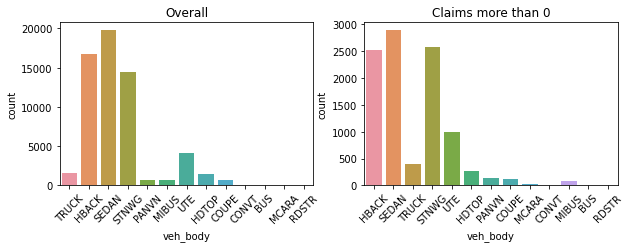

In [18]:
#Visualize Vehicle Body Type
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='veh_body',data=df_2017, ax=ax1)
label = g.set_xticklabels(g.get_xticklabels(), rotation=45)
title = g.set_title('Overall')
g = sns.countplot(x='veh_body',data=df_2017[df_2017['numclaims']>0], ax=ax2)
label = g.set_xticklabels(g.get_xticklabels(), rotation=45)
title = g.set_title('Claims more than 0')

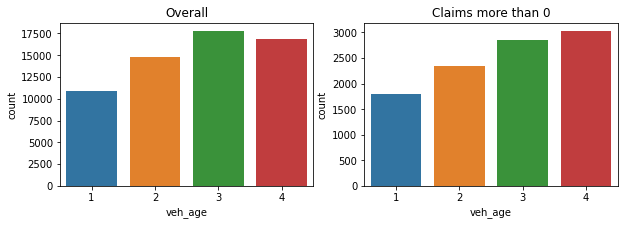

In [19]:
#Visualize Vehicle Age
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='veh_age',data=df_2017, ax=ax1)
title = g.set_title('Overall')
g = sns.countplot(x='veh_age',data=df_2017[df_2017['numclaims']>0], ax=ax2)
title = g.set_title('Claims more than 0')

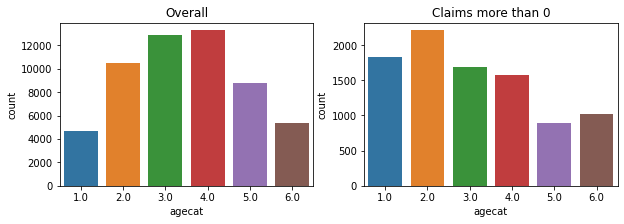

In [20]:
#Visualize Driver Age
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='agecat',data=df_2017, ax=ax1)
title = g.set_title('Overall')
g = sns.countplot(x='agecat',data=df_2017[df_2017['numclaims']>0], ax=ax2)
title = g.set_title('Claims more than 0')

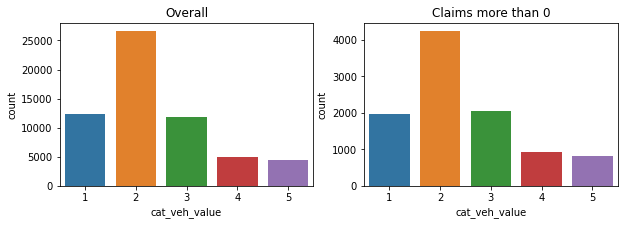

In [21]:
#Make Vehicle Value categorical
df_2017['cat_veh_value'] = df_2017['veh_value'].apply(lambda x:1 if x<=1 else 2 if x<=2 else 3 if x<=3 else 4 if x<=4 else 5)
#Visualize Vehicle Value
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='cat_veh_value',data=df_2017, ax=ax1)
title = g.set_title('Overall')
g = sns.countplot(x='cat_veh_value',data=df_2017[df_2017['numclaims']>0], ax=ax2)
title = g.set_title('Claims more than 0')

#Data Prep and Cleaning

In [22]:
df_2017.isnull().sum()

pol_number            0
pol_eff_dt            0
gender                0
agecat             4831
date_of_birth         0
credit_score       2801
area                  0
traffic_index      3503
veh_age               0
veh_body              0
veh_value             0
claim_office      50362
numclaims             0
claimcst0             0
annual_premium        0
cat_veh_value         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14d0c79278>]],
      dtype=object)

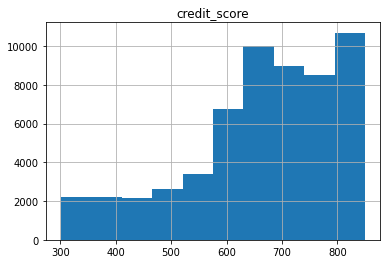

In [23]:
df_2017.hist(column='credit_score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14ccf134a8>]],
      dtype=object)

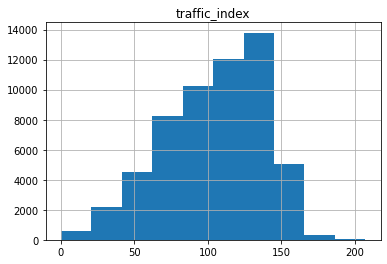

In [24]:
df_2017.hist(column='traffic_index')


In [25]:
#Function to impute missing values in 'agecat', 'credit_score' and 'traffic_index'
def missing_value(data):
    
    """ Function takes in raw data and returns cleaned data, in imputing age, bins have been crosschecked with the 
    excel file. Class labels 6 = 1900-1949, 5= 1950-159, 4 =1960-1969, 3=1970-1979, 2= 1980-1989, 1=1990-1999"""
    
    data["date_of_birth"] = pd.to_datetime(data['date_of_birth'])
    data["DOB_year"]=data.date_of_birth.dt.year
    labels=[6,5,4,3,2,1]
    data["agecat_new"] = pd.cut(df_2017.DOB_year, bins = [1900,1949,1959,1969,1979,1989,1999],labels=labels, include_lowest=True)
    data["credit_score"] = data.groupby('agecat_new')['credit_score'].apply(lambda x: x.fillna(x.mean()))
    data['veh_value'] = (data['veh_value']+1).apply(np.log)
    data.traffic_index.fillna(data.traffic_index.mean(), inplace=True)
    data.drop(["agecat"],axis=1,inplace=True)
    return(data)
    

In [26]:
clean_data_2017=missing_value(df_2017)
clean_data_2018=missing_value(df_2018)

In [27]:
clean_data_2017.isnull().sum()

pol_number            0
pol_eff_dt            0
gender                0
date_of_birth         0
credit_score          0
area                  0
traffic_index         0
veh_age               0
veh_body              0
veh_value             0
claim_office      50362
numclaims             0
claimcst0             0
annual_premium        0
cat_veh_value         0
DOB_year              0
agecat_new            0
dtype: int64

In [28]:
clean_data_2018.isnull().sum()

quote_number     0
gender           0
date_of_birth    0
credit_score     0
area             0
traffic_index    0
veh_age          0
veh_body         0
veh_value        0
DOB_year         0
agecat_new       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14d15149e8>]],
      dtype=object)

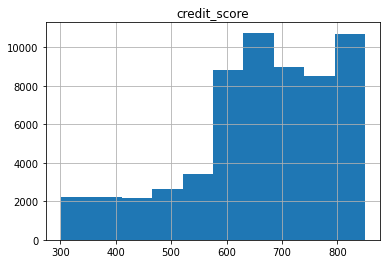

In [29]:
clean_data_2017.hist(column='credit_score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14d111c1d0>]],
      dtype=object)

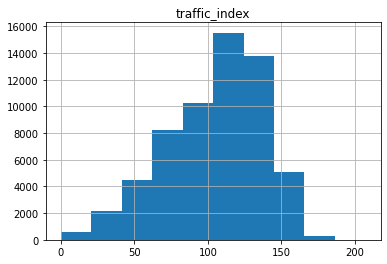

In [30]:
clean_data_2017.hist(column='traffic_index')

In [31]:
data_2017=clean_data_2017.drop(["claim_office","pol_number","pol_eff_dt","cat_veh_value","annual_premium","date_of_birth","DOB_year"],axis=1)
data_2018=clean_data_2018.drop(["quote_number","date_of_birth","DOB_year"],axis=1)
data_2018.head()

,gender,credit_score,area,traffic_index,veh_age,veh_body,veh_value,agecat_new
0,F,750.0,C,124.500000,2,HBACK,0.741937,2
1,M,567.0,F,104.416636,3,STNWG,1.124605,2
2,M,378.0,D,111.400000,3,HDTOP,1.210154,6
3,F,807.0,E,104.416636,4,UTE,1.088225,5
4,M,844.0,C,111.000000,1,HBACK,1.088225,4


#Creating Dummy Variable

In [32]:
# Dummy variable conversion using pd.dummies

data_2017=pd.get_dummies(data=data_2017, columns=['gender', 'area','veh_body'],drop_first=True)
data_2018=pd.get_dummies(data=data_2018, columns=['gender', 'area','veh_body'],drop_first=True)

In [33]:
def claim(x):
    """ Function converts claims above 0 to value 1,in order to creat a 
        class of 1 and 0 for those who claimed and those who did not"""
    if x == 0:
        return 0
    else:
        return 1
    
data_2017["claim"] = data_2017["numclaims"].apply(claim)

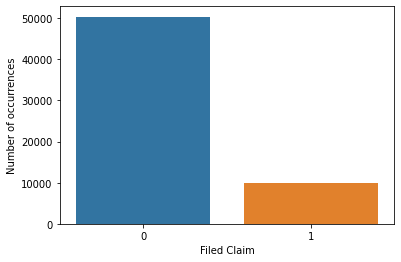

In [34]:
#Distribution of Claim class

sns.countplot(data_2017.claim);
plt.xlabel('Filed Claim');
plt.ylabel('Number of occurrences');
plt.show()

In [ ]:
#Since our minority class consist of 16% of the total data, we dont need to resample. We can simply use Stratefied KFold to sample it in our training and test set

In [35]:
#Creating test and train set 


X=data_2017.drop(["numclaims","claimcst0","claim"],axis=1)
y1=data_2017["claimcst0"]
y=data_2017["claim"]
x_test=data_2018

In [36]:
X.isnull().sum()

credit_score      0
traffic_index     0
veh_age           0
veh_value         0
agecat_new        0
gender_M          0
area_B            0
area_C            0
area_D            0
area_E            0
area_F            0
veh_body_CONVT    0
veh_body_COUPE    0
veh_body_HBACK    0
veh_body_HDTOP    0
veh_body_MCARA    0
veh_body_MIBUS    0
veh_body_PANVN    0
veh_body_RDSTR    0
veh_body_SEDAN    0
veh_body_STNWG    0
veh_body_TRUCK    0
veh_body_UTE      0
dtype: int64

In [37]:
# Grid search
logreg = LogisticRegression(class_weight='balanced')
param = {'C': [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1]}
clf = GridSearchCV(logreg, param, scoring='roc_auc', refit=True, cv=3, n_jobs=8)
clf.fit(X, y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

Best roc_auc: 0.8118, with best C: 0.3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



1 of kfold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


roc_auc_score 0.8041007016670852

2 of kfold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


roc_auc_score 0.816443462940541

3 of kfold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


roc_auc_score 0.8238168734463804

4 of kfold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


roc_auc_score 0.8211635942054694

5 of kfold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


roc_auc_score 0.7972484452916074

6 of kfold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


roc_auc_score 0.812811367327723

7 of kfold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


roc_auc_score 0.8032035743444804

8 of kfold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


roc_auc_score 0.81568024282989

9 of kfold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


roc_auc_score 0.8211267706016185

10 of kfold 10
roc_auc_score 0.7994069815969089


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 0, 'False positive rate')

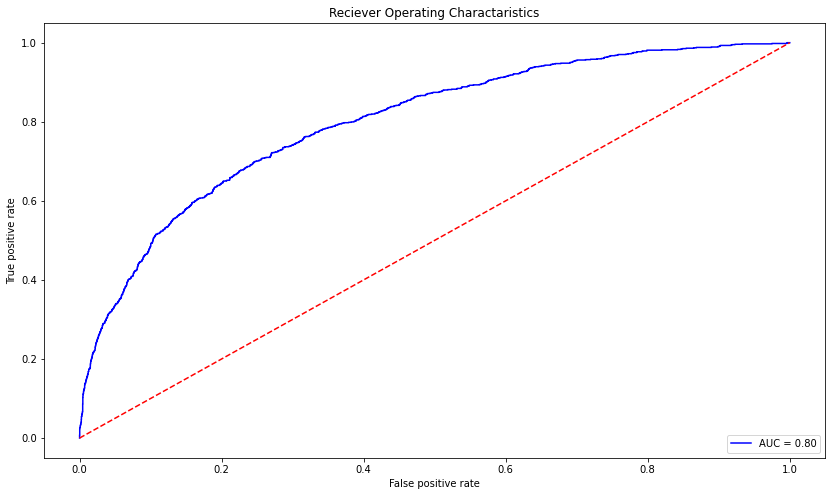

In [38]:
seed = 45
kf = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
pred_test_full = 0
cv_score = []
i = 1
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    lr = LogisticRegression(class_weight='balanced', C=0.005)
    lr.fit(xtr, ytr)
    pred_test = lr.predict_proba(xvl)[:, 1]
    score = roc_auc_score(yvl, pred_test)
    print('roc_auc_score', score)
    cv_score.append(score)
    pred_test_full += lr.predict_proba(x_test)[:, 1]
    i += 1

proba = lr.predict_proba(xvl)[:, 1]
fpr, tpr, threshold = roc_curve(yvl, proba)
auc_val = auc(fpr, tpr)

plt.figure(figsize=(14, 8))
plt.title('Reciever Operating Charactaristics')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % auc_val)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [39]:
param_grid={'n_estimators':[100,200],
            'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'max_depth':[4,6],
            'min_samples_leaf':[5,9], 
            'max_features':[1.0,0.3,0.1]
           }
            

gbrt = GradientBoostingClassifier(random_state = 0)
grid_search = GridSearchCV(gbrt, param_grid, cv=3,scoring='roc_auc')
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [40]:
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 5, 'n_estimators': 100}



1 of kfold 10
roc_auc_score 0.8165054172404367

2 of kfold 10
roc_auc_score 0.825163184260995

3 of kfold 10
roc_auc_score 0.8357505917513544

4 of kfold 10
roc_auc_score 0.8361886144584516

5 of kfold 10
roc_auc_score 0.8121073633745309

6 of kfold 10
roc_auc_score 0.8248134864667317

7 of kfold 10
roc_auc_score 0.8131697045479923

8 of kfold 10
roc_auc_score 0.8238196451154877

9 of kfold 10
roc_auc_score 0.8279841769370206

10 of kfold 10
roc_auc_score 0.8158820797337931


Text(0.5, 0, 'False positive rate')

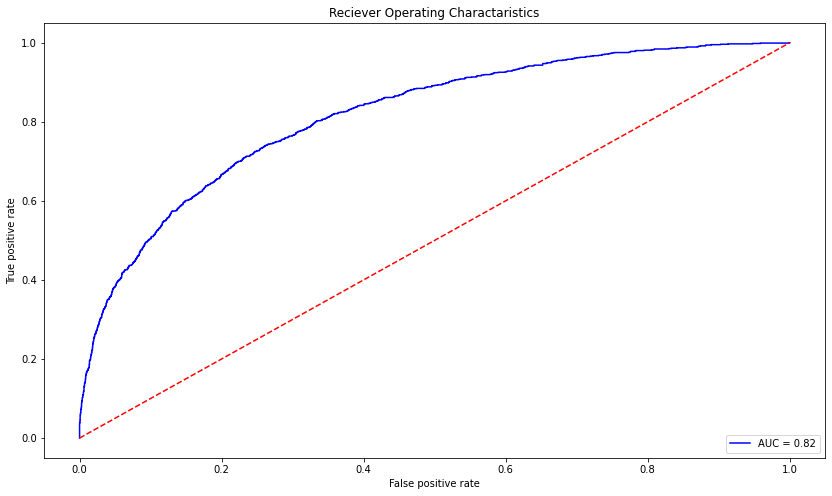

In [41]:
seed = 45
kf = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
pred_test_full = 0
cv_score = []
i = 1
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    gb = GradientBoostingClassifier(learning_rate=0.1,max_depth=4,max_features=0.3,min_samples_leaf=5,n_estimators=100)
    gb.fit(xtr, ytr)
    pred_test = gb.predict_proba(xvl)[:, 1]
    score = roc_auc_score(yvl, pred_test)
    print('roc_auc_score', score)
    cv_score.append(score)
    pred_test_full += gb.predict_proba(x_test)[:, 1]
    i += 1

proba = gb.predict_proba(xvl)[:, 1]
fpr, tpr, threshold = roc_curve(yvl, proba)
auc_val = auc(fpr, tpr)

plt.figure(figsize=(14, 8))
plt.title('Reciever Operating Charactaristics')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % auc_val)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [42]:
print(classification_report(y,gb.predict(X)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     50362
           1       0.68      0.32      0.44     10030

    accuracy                           0.86     60392
   macro avg       0.78      0.65      0.68     60392
weighted avg       0.84      0.86      0.84     60392



In [43]:
#Averaging the total probability got in 10 iterations

In [45]:
y_pred=pred_test_full/10

In [ ]:
#Since our train data had only 16% customers who had claims, we will keep the same threshold in the test data, so if probability of class 1 thats is the class for claim is more than 0.16, we will skip that and keep the rest as customers having low probability of claim

In [46]:
Low = pd.DataFrame({'QuoteNumber':clean_data_2018['quote_number'],'claim_prob':y_pred})
Low['claim_low'] = Low['claim_prob'].apply(lambda x: 1 if x>0.1666 else 0)

In [47]:
Low[Low.claim_prob>.16].head()

,QuoteNumber,claim_prob,claim_low
1,16732441,0.413016,1
2,68744228,0.840514,1
6,58572612,0.260831,1
11,35005918,0.328117,1
16,75159402,0.187067,1


In [48]:
#Number of cusotmer predicted as having low claims

Low[Low.claim_low==0].count()

QuoteNumber    5105
claim_prob     5105
claim_low      5105
dtype: int64

In [49]:
# Adding probability metric to our original dataset for future use
df_2018["claim"]=Low.claim_low
data_2018["claim"]=Low.claim_low

#Predicting Claim Severity for future with those who has probability more than 0.16 and are identified as potential customers for asking claims

In [50]:
# creating new dataframe for regression, keeping only those who had claim in 2017, 
# and those predicted for claim in 2018

claim_severity_train=data_2017[data_2017.claim>0]
claim_severity_test=data_2018[data_2018.claim>0]

In [51]:
#Creating metric for cost per claim

In [52]:
claim_severity_train["amountperclaim"]=(claim_severity_train.claimcst0/claim_severity_train.numclaims)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#Looking at the distribution of cost per claim amount

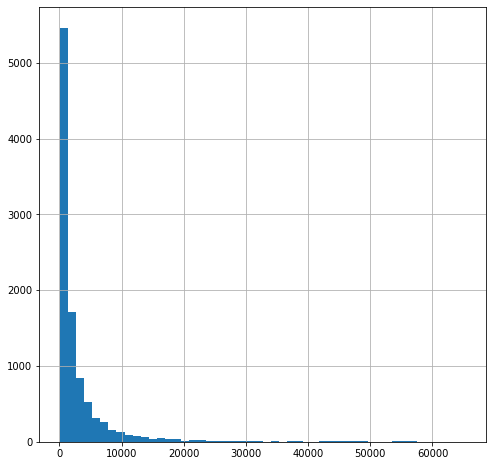

In [53]:
claim_severity_train.amountperclaim.hist(figsize=(8,8),bins=50)

#Since our data is skewed, we will do a log transform for this metric in order to remove skewness

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


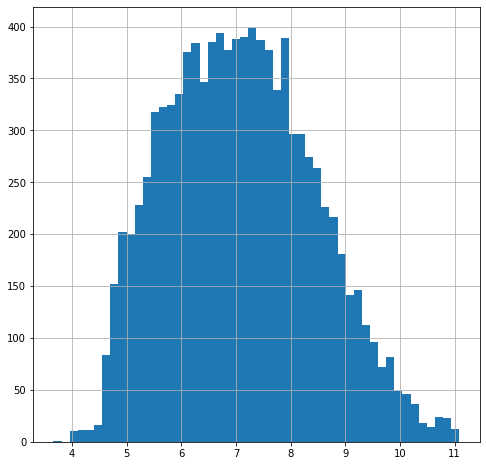

In [54]:
claim_severity_train["log_amount"]=(claim_severity_train.amountperclaim+1).apply(np.log)
claim_severity_train["log_amount"].hist(figsize=(8,8),bins=50)

In [55]:
# Creating X and Y for regression analysis

X_reg=claim_severity_train.drop(["numclaims","claimcst0","claim","amountperclaim","log_amount"],axis=1)
y_reg=claim_severity_train.log_amount

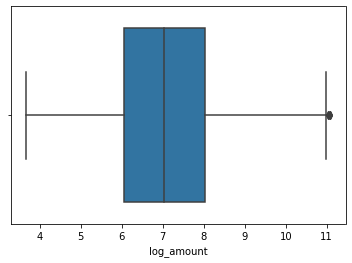

In [56]:
# Looking at our target variable just to see if there are any outliers
sns.boxplot(x=y_reg)

In [57]:
# train-test split

X_regtrain, X_regtest, y_regtrain, y_regtest = train_test_split(X_reg,y_reg,random_state = 0)

#Running Gradient Boosting with Hyperparameter Tuning

In [58]:
param_grid={'n_estimators':[200],
            'learning_rate': [0.1, 0.05, 0.02],
            'max_depth':[6],
            'min_samples_leaf':[3,5], 
            'max_features':[1.0,0.3,0.1] }

gbrt = GradientBoostingRegressor(random_state = 0)
grid_search = GridSearchCV(gbrt, param_grid, cv=5)
grid_search.fit(X_regtrain, y_regtrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [59]:
print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 6, 'max_features': 0.3, 'min_samples_leaf': 5, 'n_estimators': 200}


In [60]:
gbrt = GradientBoostingRegressor(learning_rate=0.05,max_depth=6,max_features=0.3,min_samples_leaf=5,n_estimators=200)
gbrt.fit(X_regtrain, y_regtrain)
predGB=gbrt.predict(X_regtest)

In [61]:
print("RSquare on test set of the model: ",r2_score(predGB,y_regtest))
print("Mean Square Error of the model: ",mean_squared_error(predGB,y_regtest))

RSquare on test set of the model:  0.7398263556347331
Mean Square Error of the model:  0.3603271261215064


#Running Random Forest with Hyperparameter tuning

In [62]:
param_grid = {"max_depth": np.arange(5,10,20),
              "max_features": [1, 5, 10,15],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10]}

rand = RandomForestRegressor(random_state = 0)
grid_search = GridSearchCV(rand, param_grid, cv=5)
grid_search.fit(X_regtrain, y_regtrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [63]:
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}


In [64]:
rand = RandomForestRegressor(max_depth=5, max_features=10, min_samples_split=10, min_samples_leaf=3)
rand.fit(X_regtrain, y_regtrain)
predRF=rand.predict(X_regtest)

In [65]:
print("RSquare on test set of the model: ",r2_score(predRF,y_regtest))
print("Mean Square Error of the model: ",mean_squared_error(predRF,y_regtest))

RSquare on test set of the model:  0.34515225163501484
Mean Square Error of the model:  0.5866382095045107


#Gradient boosting gives us the best results with R2 of 0.73 and very low MSE, hence we will use Gradient boosting for final prediction

In [66]:
predGB=pd.DataFrame(predGB)
predGB=predGB.apply(np.exp)

#Predicting Claim severity for 2018 customers

In [67]:
claim_severity_test.head()

,credit_score,traffic_index,veh_age,veh_value,agecat_new,gender_M,area_B,area_C,area_D,area_E,area_F,veh_body_CONVT,veh_body_COUPE,veh_body_HBACK,veh_body_HDTOP,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE,claim
1,567.0,104.416636,3,1.124605,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,378.0,111.400000,3,1.210154,6,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6,647.0,156.000000,3,1.364815,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
11,619.0,147.000000,3,0.682592,2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
16,328.0,86.800000,4,0.817575,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [68]:
X_reg_test=claim_severity_test.drop(["claim"],axis=1)
predtest=gbrt.predict(X_reg_test)

#We will have to do inverse transform of our predicted values so as to get the actual values as we performed log transform to remove skewness

In [69]:
predtest=pd.DataFrame(predtest)
predtest=predtest.apply(np.exp)

Finding lowest 10% of the prdecited claim customers

In [70]:
n=math.floor(0.1*len(pred_test))
Lowest=predtest.nsmallest(n,0)
Lowest=Lowest.rename({0:'Claim_Severity'},axis=1)

In [71]:
CustomerClaims=df_2018.join(Lowest,how='right')
CustomerClaims.head()

,quote_number,gender,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,DOB_year,agecat_new,claim,Claim_Severity
1112,61432340,F,1964-07-13,668.0,E,10.5,1,SEDAN,0.999160,1964,4,0,123.494890
1146,52037944,F,1989-12-10,427.0,E,22.5,1,STNWG,1.397976,1989,1,1,128.447614
99,44383766,M,1930-05-05,420.0,B,123.9,4,HBACK,0.589452,1930,2,1,140.412575
361,55103679,M,1960-08-07,832.0,A,51.0,2,MCARA,1.764731,1960,1,0,141.637914
1961,66145129,M,1953-05-06,764.0,C,132.0,2,SEDAN,1.163151,1953,3,0,141.737621


#Generating Risk Profile based on probability of claim

In [72]:
RiskProfile=df_2018.copy()
RiskProfile["ClaimProb"]=Low.claim_prob

In [73]:
def risk(X):
    
    """ Functions generates Risk profile based on probability of claim
            and gives out 3 profiles, Low, Medium and High"""
    
    risk=[]
    if X<0.166:
        risk="Low"
    elif 0.166<=X<0.4:
        risk="Medium"
    else:
        risk="High"
    return(risk)
RiskProfile["Risk"]=RiskProfile.ClaimProb.apply(risk)

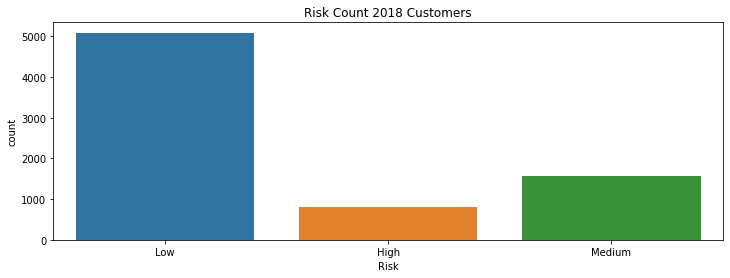

In [74]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12,4)
g = sns.countplot(x='Risk',data=RiskProfile)
title = g.set_title('Risk Count 2018 Customers')

In [80]:
#RiskProfile.to_csv("finall.csv")


In [81]:
#data_2017=pd.dummies(data=data_2017, columns=['gender', 'area','veh_body'],drop_first=True)